<a href="https://colab.research.google.com/github/sinheechan/ML/blob/main/%5BDataset%5D_iris_%EA%B2%B0%EC%A0%95%EA%B2%BD%EA%B3%84_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Dataset] iris_결정경계 시각화

# 1. 초기 세팅

### 1.1 라이브러리 import

In [5]:
from sklearn.datasets import load_iris, make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

colors = sns.color_palette('husl')

### 1.2 데이터 불러오기

In [6]:
iris_data = load_iris()

## 2. Decision Tree 모델의 시각화

### 2.1 train / test 데이터셋 분할

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

120 120
30 30


### 2.2 DecicionTreeClassifier 생성 및 학습

In [ ]:
# DecicionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

### 2.3 모델 시각화

- export_graphviz 함수를 사용하여 결정 트리 모델을 시각화하고, 그 결과를 .dot 형식의 파일로 저장한다.

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names,
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

1) max_depth의 제약이 없는 경우의 Decision Tree 시각화

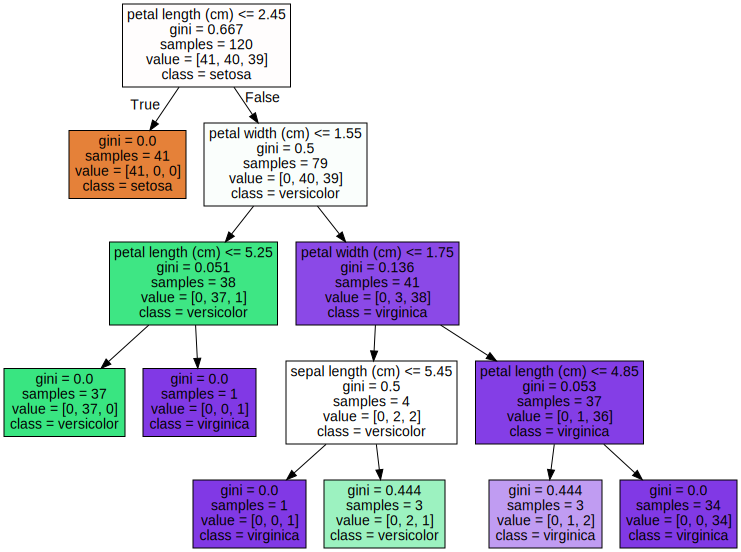

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

[요약]
- 박스의 색이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미한다.
- petal length(cm) <= 2.45 와 같이 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건으로 이런 것이 없는 것은 리프노드입니다.
- gini는 다음의 value = [ ] 로 주어진 데이터 분포에서의 지니계수
- samples : 현 규칙에 해당하는 데이터 건수
- value = [ ] 클래스 값 기반의 데이터 건수 ( 이번 예제의 경우 0: Setosa, 1 : Veericolor, 2: Virginia 를 나타냄 )

2) max_depth=3인 경우의 Decision Tree 시각화

===============max_depth=3인 경우의 Decision Tree 시각화==================


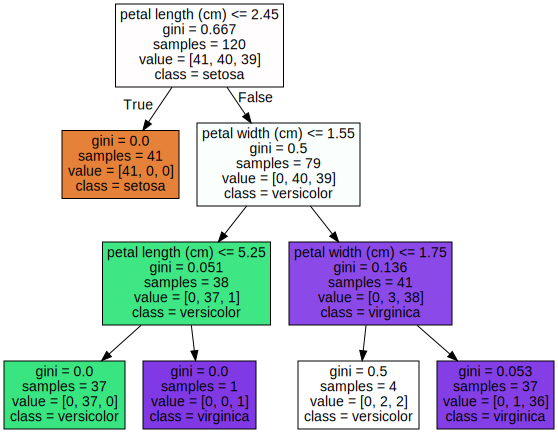

In [ ]:
# DecicionTreeClassifier 생성 (max_depth = 3 으로 제한)
dt_clf = DecisionTreeClassifier(max_depth=3 ,random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names,
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

max_depth를 3으로 제한한 결과 처음보다 간결한 형태의 트리가 만들어졌다.

3) min_samples_split=4인 경우의 Decision Tree 시각화

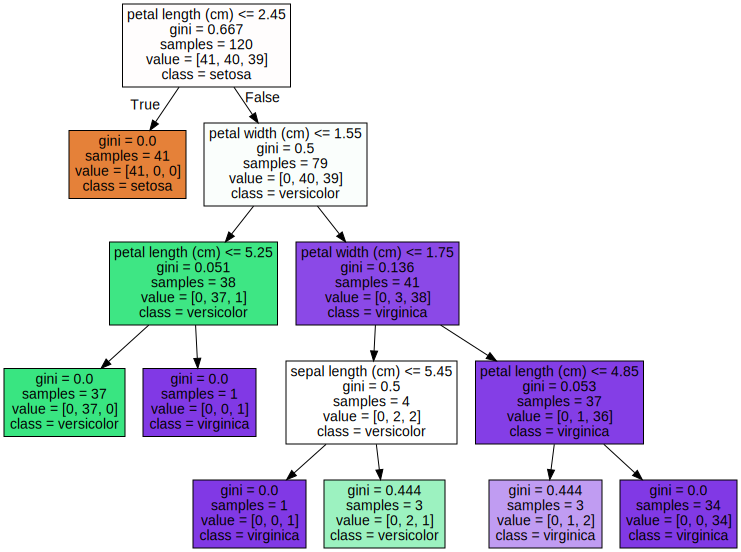

In [ ]:
# DecicionTreeClassifier 생성 (min_samples_split=4로 상향)
dt_clf = DecisionTreeClassifier(min_samples_split=4 ,random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names,
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- sample = 3 인 경우 샘플 내 상이한 값이 있어도 처음과 달리 더 이상 분할하지 않게 되어 트리의 깊이가 줄어들었다.

4) min_samples_leaf=4인 경우의 Decision Tree 시각화

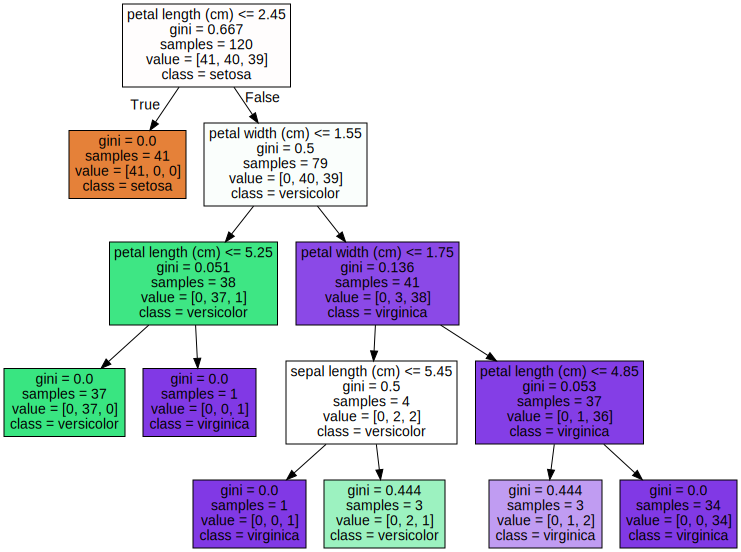

In [ ]:
# DecicionTreeClassifier 생성 (min_samples_split=4로 상향)
dt_clf = DecisionTreeClassifier(min_samples_split=4 ,random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names,
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 자식이 없는 리프노드는 클래스 결정 값이 되는데 min_samples_leaf 는 리프노드가 될 수 있는 샘플 데이터의 최소 갯수를 지정합니다.

- 위와 비교해보면 기존에 샘플갯수가 3이하이던 리프노드들이 샘플갯수가 4가 되도로 변경되었음을 볼 수 있다.
- 결과적으로 처음보다 트리가 간결해졌다.

## 3. Feature Importance 시각화

- 학습을 통해 규칙을 정하는 데 있어 피처의 중요도를 DecisionTreeClassifier 객체의 featureimportances 속성으로 확인할 수 있습니다.
  - 기본적으로 ndarray형태로 값을 반환하며 피처 순서대로 값이 할당

Feature Importances:
[0.009 0.    0.557 0.435]

sepal length (cm): 0.009
sepal width (cm): 0.000
petal length (cm): 0.557
petal width (cm): 0.435


<Axes: >

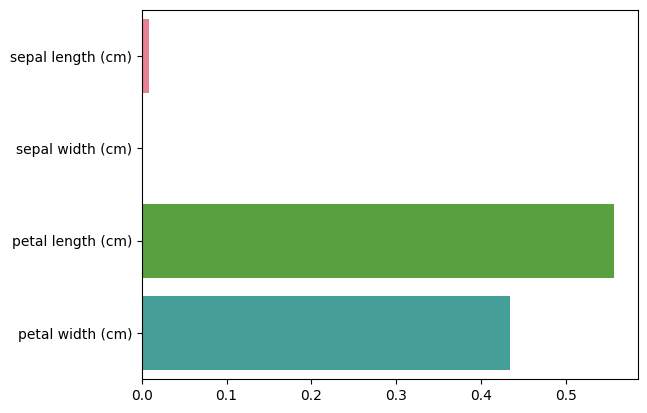

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

# feature importance 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names, palette = colors)

## 4. Decision Tree의 과적합(Overfitting) 시각화

- 임의의 데이터 세트를 통한 과적합 문제 시각화한다.

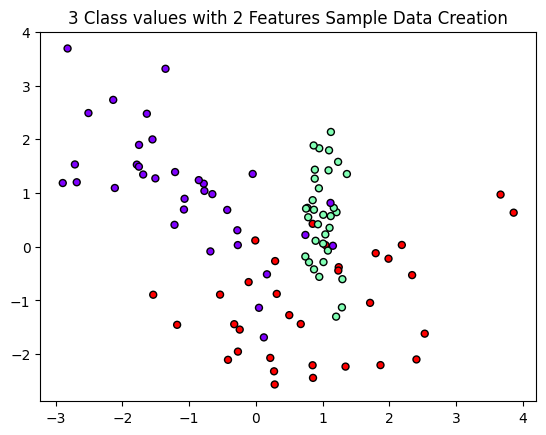

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample Data Creation")

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                                                  n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피쳐로 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor = 'k', cmap='rainbow')

- 우선 트리 생성 시 파라미터를 디폴트 값으로 놓고, 데이터가 어떻게 분류되는지 확인한다.

In [ ]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

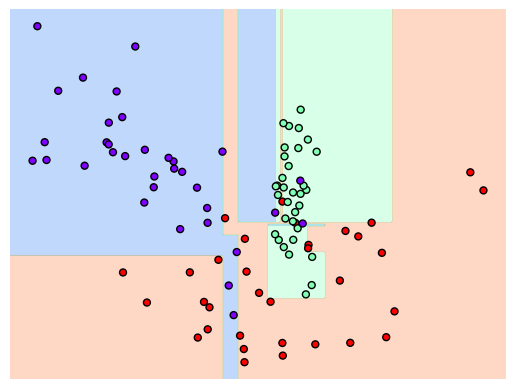

In [ ]:
# 특정한 트리 생성에 제약이 없는(전체 default 값) Decision Tree의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 위의 경우 매우 얇은 영역으로 나타난 부분은 이상치에 해당하는데, 이런 이상치까지 모두 분류하기 위해 분할한 결과 결정 기준 경계가 많아졌다.
-결정 트리의 기본 하이퍼 파라미터 설정은 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준으로  인해 결정 기준 경계가 많아지고 복잡해졌다.
  - 이런 경우 조금만 형태가 다른 데이터가 들어와도 정확도가 매우 떨어지게 된다.

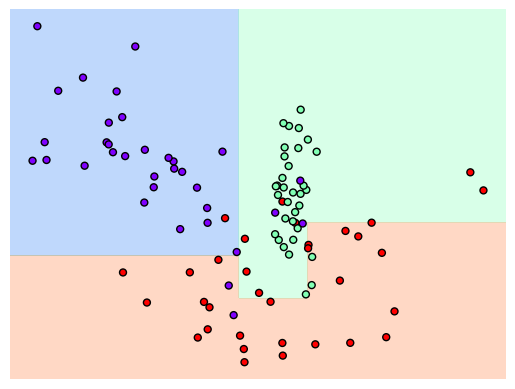

In [ ]:
# min_samples_leaf = 6 으로 설정한 Decision Tree의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- min_samples_leaf=6을 설정해 6개 이하의 데이터는 리프노드를 생성할 수 있도록 리프노드 생성 규칙을 완화한 뒤 실행했다.
- default 값으로 실행한 앞선 경우보다 이상치에 크게 반응하지 않으면서 일반화된 분류 규칙에 의해 분류되었음을 확인할 수 있다.

Decision Tree의 과적합을 줄이기 위한 파라미터 튜닝
- (1) max_depth 를 줄여서 트리의 깊이 제한
- (2) min_samples_split 를 높여서 데이터가 분할하는데 필요한 샘플 데이터의 수를 높이기
- (3) min_samples_leaf 를 높여서 말단 노드가 되는데 필요한 샘플 데이터의 수를 높이기
- (4) max_features를 높여서 분할을 하는데 고려하는 feature의 수 제한